In [142]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from tabulate import tabulate

In [43]:
def truncate(array):
    values = []
    zeros = []
    for arr in array:
        a = arr.toarray()[0]
        h = a[a != 0]
        values.append(h)
        z = arr.shape[1] - len(h)
        zeros.append(z)
    return values, zeros

In [44]:
twenty_train = fetch_20newsgroups(subset = 'train', shuffle = True, random_state = 42, remove = ['headers', 'footers',  'quotes'])
train_data_20 = twenty_train.data
train_label_20 = twenty_train.target
df = pd.DataFrame(list(zip(train_data_20, train_label_20)), columns = ['Text Twenty', 'Label Twenty'])
df

,Text Twenty,Label Twenty
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",4
11311,I just installed a DX2-66 CPU in a clone mothe...,3
11312,\nWouldn't this require a hyper-sphere. In 3-...,1


In [45]:
#count_vectorize = CountVectorizer(lowercase = True, stop_words = 'english', token_pattern = r'[A-Za-z]+', min_df = 10)
count_vectorize = CountVectorizer(lowercase = True, stop_words = 'english', min_df = 5)
count_train_20 = count_vectorize.fit_transform(train_data_20)
vocabulary_20 = count_vectorize.get_feature_names_out()
#Truncated to understand the data better
counts, zeros = truncate(count_train_20)
df = pd.DataFrame(list(zip(counts, zeros, train_label_20)), columns = ['Counts 20', 'Zero Counts', 'Label'])
df

,Counts 20,Zero Counts,Label
0,"[1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, ...",17765,7
1,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",17753,4
2,"[1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, ...",17680,4
3,"[1, 1, 1, 1, 1, 1, 1]",17790,1
4,"[1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...",17762,14
...,...,...,...
11309,"[1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 3, 1, 1, ...",17706,13
11310,"[1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...",17758,4
11311,"[1, 1, 1, 1, 1, 3, 8, 1, 1, 2, 1, 1, 1, 1, 1, ...",17765,3
11312,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, ...",17777,1


In [46]:
tfidf_transformer = TfidfTransformer(use_idf = True)
tfidf_train_20 = tfidf_transformer.fit_transform(count_train_20)
tfidf, zeros = truncate(tfidf_train_20)
df = pd.DataFrame(list(zip(tfidf, zeros, train_label_20)), columns = ['TF - IDF 20', 'Zero', 'Label'])
df

,TF - IDF 20,Zero,Label
0,"[0.22268463890731952, 0.22056044729121263, 0.1...",17765,7
1,"[0.11622198608645516, 0.16013432337095507, 0.2...",17753,4
2,"[0.07852732602026478, 0.17165710511419432, 0.3...",17680,4
3,"[0.35053174521915187, 0.3654641062482984, 0.30...",17790,1
4,"[0.17846063118225275, 0.12283698049865993, 0.1...",17762,14
...,...,...,...
11309,"[0.035584207219527896, 0.04879965775214506, 0....",17706,13
11310,"[0.17129415665555076, 0.12402437194993798, 0.3...",17758,4
11311,"[0.08884539818419648, 0.12649862739742818, 0.0...",17765,3
11312,"[0.1548247771360115, 0.2476989335870355, 0.179...",17777,1


In [47]:
tfidf_transformer = TfidfTransformer(use_idf = False)
tf_train_20 = tfidf_transformer.fit_transform(count_train_20)
tf, zeros = truncate(tf_train_20)
df = pd.DataFrame(list(zip(tf, zeros, train_label_20)), columns = ['TF 20', 'Zero', 'Label'])
df

,TF 20,Zero,Label
0,"[0.14586499149789456, 0.14586499149789456, 0.1...",17765,7
1,"[0.13018891098082389, 0.13018891098082389, 0.2...",17753,4
2,"[0.06967330142916177, 0.13934660285832354, 0.2...",17680,4
3,"[0.3779644730092272, 0.3779644730092272, 0.377...",17790,1
4,"[0.1414213562373095, 0.1414213562373095, 0.141...",17762,14
...,...,...,...
11309,"[0.06119900613621046, 0.06119900613621046, 0.0...",17706,13
11310,"[0.1270001270001905, 0.1270001270001905, 0.254...",17758,4
11311,"[0.09205746178983235, 0.09205746178983235, 0.0...",17765,3
11312,"[0.18569533817705186, 0.18569533817705186, 0.1...",17777,1


In [48]:
#hashing_vectorizer = HashingVectorizer(lowercase = True, stop_words = 'english', token_pattern = r'[A-Za-z]+', n_features = 2 ** 16)
hashing_vectorizer = HashingVectorizer(lowercase = True, stop_words = 'english', n_features = 2 ** 14)
hash_train_20 = hashing_vectorizer.fit_transform(train_data_20)
hash, zeros = truncate(hash_train_20)
df = pd.DataFrame(list(zip(hash, zeros, train_label_20)), columns = ['Hashing 20', 'Zero', 'Label'])
df

,Hashing 20,Zero,Label
0,"[0.14285714285714285, 0.14285714285714285, -0....",16350,7
1,"[0.13018891098082389, -0.13018891098082389, -0...",16340,4
2,"[-0.06835859270246633, 0.06835859270246633, -0...",16259,4
3,"[0.3779644730092272, -0.3779644730092272, 0.37...",16377,1
4,"[-0.2721655269759087, -0.2721655269759087, -0....",16345,14
...,...,...,...
11309,"[0.05913123959890826, -0.05913123959890826, -0...",16277,13
11310,"[-0.12126781251816648, -0.12126781251816648, -...",16339,4
11311,"[0.09128709291752768, -0.09128709291752768, 0....",16350,3
11312,"[-0.18257418583505536, 0.18257418583505536, 0....",16363,1


In [49]:
ds = np.DataSource()
csv = ds.abspath('training.1600000.processed.noemoticon.csv')
df = pd.read_csv(csv, names = ['Label', 'ID', 'Date', 'Category', 'User', 'Text'], header = None, encoding = 'latin-1')
df = df.sample(frac = 1).reset_index(drop = True)
df

,Label,ID,Date,Category,User,Text
0,4,1679805630,Sat May 02 10:13:16 PDT 2009,NO_QUERY,katiehaskell,@DavidManess Thanks. It was actually a joke.
1,4,1751289485,Sat May 09 19:06:09 PDT 2009,NO_QUERY,osmium,I'm back from my first 5K running race And s...
2,4,2176424620,Mon Jun 15 03:50:19 PDT 2009,NO_QUERY,checheezycricia,is hindi makatayo sa tapat ng pc para gumawa n...
3,4,2182887692,Mon Jun 15 13:46:00 PDT 2009,NO_QUERY,missmichellezta,misses mr. manuel very much -- thinking about ...
4,4,2056592987,Sat Jun 06 11:25:45 PDT 2009,NO_QUERY,MunkyMunch,@andreleroux i am! you too?
...,...,...,...,...,...,...
1599995,0,2018141377,Wed Jun 03 09:30:09 PDT 2009,NO_QUERY,hannuhhhx3,@miguelangelji that really sucks i'll do it ...
1599996,0,1754353505,Sun May 10 05:58:35 PDT 2009,NO_QUERY,alaricthegoth,@danslee huge ground there though - were dumpe...
1599997,0,2016793483,Wed Jun 03 07:22:11 PDT 2009,NO_QUERY,janeidechillis,"@dimedemeanor, yep it is the you die"
1599998,0,2177717934,Mon Jun 15 06:35:10 PDT 2009,NO_QUERY,kickuinthetight,wishes I didn't have to work so I could go to ...


In [50]:
train_data_sentiment = df['Text'].values.tolist()[:100000]
train_label_sentiment = df['Label'].values.tolist()[:100000]
len(train_label_sentiment)

100000

In [51]:
#count_vectorize = CountVectorizer(lowercase = True, stop_words = 'english', token_pattern = r'[A-Za-z]+', min_df = 5)
count_vectorize = CountVectorizer(lowercase = True, stop_words = 'english', min_df = 5)
count_train = count_vectorize.fit_transform(train_data_sentiment)
vocabulary_sentiment = count_vectorize.get_feature_names_out()
counts, zeros = truncate(count_train)
df = pd.DataFrame(list(zip(counts, zeros, train_label_sentiment)), columns = ['Counts', 'Zero', 'Label'])
df

,Counts,Zero,Label
0,"[1, 1, 1]",10795,4
1,"[1, 1, 1, 1]",10794,4
2,"[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]",10787,4
3,"[1, 1, 1, 1, 1, 1]",10792,4
4,[],10798,4
...,...,...,...
99995,"[1, 1, 1, 1]",10794,4
99996,"[1, 1]",10796,4
99997,"[1, 1, 1, 1, 1, 1]",10792,0
99998,"[1, 1, 1, 1, 1, 1, 1]",10791,0


In [52]:
tfidf_transformer = TfidfTransformer(use_idf = True)
tfidf_train = tfidf_transformer.fit_transform(count_train)
tfidf, zeros = truncate(tfidf_train)
df = pd.DataFrame(list(zip(tfidf, zeros, train_label_sentiment)), columns = ['TF - IDF', 'Zeros', 'Label'])
df

,TF - IDF,Zeros,Label
0,"[0.5421100372217339, 0.7278166756127427, 0.419...",10795,4
1,"[0.6029801673017614, 0.4880629328787652, 0.476...",10794,4
2,"[0.3116367838802588, 0.15143634082831448, 0.34...",10787,4
3,"[0.2487757737113845, 0.35832873941113924, 0.47...",10792,4
4,[],10798,4
...,...,...,...
99995,"[0.6192239393042773, 0.38897026676173596, 0.25...",10794,4
99996,"[0.6449744412635063, 0.7642041416511874]",10796,4
99997,"[0.363565878873615, 0.5042495495277542, 0.4118...",10792,0
99998,"[0.257159230304603, 0.5029151251837832, 0.3249...",10791,0


In [53]:
tfidf_transformer = TfidfTransformer(use_idf = False)
tf_train = tfidf_transformer.fit_transform(count_train)
tf, zeros = truncate(tf_train)
df = pd.DataFrame(list(zip(tf, zeros, train_label_sentiment)), columns = ['TF', 'Zeros', 'Label'])
df

,TF,Zeros,Label
0,"[0.5773502691896258, 0.5773502691896258, 0.577...",10795,4
1,"[0.5, 0.5, 0.5, 0.5]",10794,4
2,"[0.2672612419124244, 0.2672612419124244, 0.267...",10787,4
3,"[0.4082482904638631, 0.4082482904638631, 0.408...",10792,4
4,[],10798,4
...,...,...,...
99995,"[0.5, 0.5, 0.5, 0.5]",10794,4
99996,"[0.7071067811865475, 0.7071067811865475]",10796,4
99997,"[0.4082482904638631, 0.4082482904638631, 0.408...",10792,0
99998,"[0.3779644730092272, 0.3779644730092272, 0.377...",10791,0


In [54]:
#hashing_vectorizer = HashingVectorizer(lowercase = True, stop_words = 'english', token_pattern = r'[A-Za-z]+', n_features = 2 ** 16)
hashing_vectorizer = HashingVectorizer(lowercase = True, stop_words = 'english', n_features = 2 ** 14)
hash_train = hashing_vectorizer.fit_transform(train_data_sentiment)
hash, zeros = truncate(hash_train)
df = pd.DataFrame(list(zip(hash, zeros, train_label_sentiment)), columns = ['Hashing', 'Zero', 'Label'])
df

,Hashing,Zero,Label
0,"[-0.5, 0.5, -0.5, 0.5]",16380,4
1,"[0.5, -0.5, -0.5, 0.5]",16380,4
2,"[-0.23570226039551587, 0.23570226039551587, -0...",16369,4
3,"[0.3779644730092272, -0.3779644730092272, -0.3...",16377,4
4,[1.0],16383,4
...,...,...,...
99995,"[-0.4472135954999579, -0.4472135954999579, 0.4...",16379,4
99996,"[0.7071067811865475, 0.7071067811865475]",16382,4
99997,"[-0.3779644730092272, 0.3779644730092272, -0.3...",16377,0
99998,"[0.3779644730092272, -0.3779644730092272, 0.37...",16377,0


In [55]:
twenty_test = fetch_20newsgroups(subset = 'test', shuffle = True, random_state = 42, remove = ['headers', 'footers',  'quotes'])
test_data_20 = twenty_test.data
test_label_20 = twenty_test.target
df = pd.DataFrame(list(zip(test_data_20, test_label_20)), columns = ['Text 20', 'Label'])
df

,Text 20,Label
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19
...,...,...
7527,"\n Henry, if I read you correctly, you may b...",14
7528,"about\nthem on\n\nActually, I thought Macs wer...",4
7529,"I sent a version of this post out a while ago,...",9
7530,I have this kit which includes the following :...,6


In [56]:
#count_vectorize = CountVectorizer(lowercase = True, stop_words = 'english', token_pattern = r'[A-Za-z]+', vocabulary = vocabulary_20, min_df = 10)
count_vectorize = CountVectorizer(lowercase = True, stop_words = 'english', vocabulary = vocabulary_20, min_df = 5)
count_test_20 = count_vectorize.fit_transform(test_data_20)
#Truncated to understand the data better
counts, zeros = truncate(count_test_20)
df = pd.DataFrame(list(zip(counts, zeros, test_label_20)), columns = ['Test Counts 20', 'Zero Counts', 'Label'])
df

,Test Counts 20,Zero Counts,Label
0,"[1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, ...",17768,7
1,"[1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, ...",17769,5
2,"[1, 1]",17795,0
3,"[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, ...",17606,17
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",17787,19
...,...,...,...
7527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",17732,14
7528,"[1, 1, 1, 1, 1, 1]",17791,4
7529,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, ...",17759,9
7530,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, ...",17752,6


In [57]:
tfidf_transformer = TfidfTransformer(use_idf = True)
tfidf_test_20 = tfidf_transformer.fit_transform(count_test_20)
tfidf, zeros = truncate(tfidf_test_20)
df = pd.DataFrame(list(zip(tfidf, zeros, test_label_20)), columns = ['Test TF - IDF 20', 'Zero', 'Label'])
df

,Test TF - IDF 20,Zero,Label
0,"[0.18348902463096328, 0.3681902025908532, 0.11...",17768,7
1,"[0.13171710634060527, 0.17903294542246104, 0.1...",17769,5
2,"[0.7340861328640472, 0.6790563669804652]",17795,0
3,"[0.03604715444530815, 0.03536068410358211, 0.0...",17606,17
4,"[0.4190294779181316, 0.34051354871919826, 0.15...",17787,19
...,...,...,...
7527,"[0.1042660869678505, 0.09506803285102816, 0.14...",17732,14
7528,"[0.3269576234464006, 0.34196467546853443, 0.30...",17791,4
7529,"[0.1630928264903057, 0.10879240014285112, 0.17...",17759,9
7530,"[0.25724862941842896, 0.15504471759980867, 0.1...",17752,6


In [58]:
tfidf_transformer = TfidfTransformer(use_idf = False)
tf_test_20 = tfidf_transformer.fit_transform(count_test_20)
tf, zeros = truncate(tf_test_20)
df = pd.DataFrame(list(zip(tf, zeros, test_label_20)), columns = ['Test TF 20', 'Zero', 'Label'])
df

,Test TF 20,Zero,Label
0,"[0.15075567228888181, 0.30151134457776363, 0.1...",17768,7
1,"[0.1414213562373095, 0.1414213562373095, 0.141...",17769,5
2,"[0.7071067811865475, 0.7071067811865475]",17795,0
3,"[0.040723148118768406, 0.040723148118768406, 0...",17606,17
4,"[0.31622776601683794, 0.31622776601683794, 0.3...",17787,19
...,...,...,...
7527,"[0.10425720702853739, 0.10425720702853739, 0.1...",17732,14
7528,"[0.4082482904638631, 0.4082482904638631, 0.408...",17791,4
7529,"[0.13245323570650439, 0.13245323570650439, 0.1...",17759,9
7530,"[0.22086305214969307, 0.11043152607484653, 0.1...",17752,6


In [59]:
#hashing_vectorizer = HashingVectorizer(lowercase = True, stop_words = 'english', token_pattern = r'[A-Za-z]+', n_features = 2 ** 16)
hashing_vectorizer = HashingVectorizer(lowercase = True, stop_words = 'english', n_features = 2 ** 14)
hash_test_20 = hashing_vectorizer.fit_transform(test_data_20)
hash, zeros = truncate(hash_test_20)
df = pd.DataFrame(list(zip(hash, zeros, test_label_20)), columns = ['Hashing 20', 'Zero', 'Label'])
df

,Hashing 20,Zero,Label
0,"[-0.2857142857142857, 0.14285714285714285, -0....",16350,7
1,"[-0.13483997249264842, 0.26967994498529685, -0...",16351,5
2,"[-0.7071067811865475, -0.7071067811865475]",16382,0
3,"[0.03857583749052298, 0.03857583749052298, 0.0...",16163,17
4,"[0.31622776601683794, 0.31622776601683794, -0....",16374,19
...,...,...,...
7527,"[0.09805806756909202, -0.09805806756909202, 0....",16307,14
7528,"[-0.30151134457776363, -0.30151134457776363, -...",16373,4
7529,"[-0.12909944487358055, -0.12909944487358055, 0...",16343,9
7530,"[0.0716114874039433, 0.0716114874039433, 0.644...",16324,6


In [60]:
ds = np.DataSource()
csv = ds.abspath('testdata.manual.2009.06.14.NEW.csv')
df = pd.read_csv(csv, names = ['Label', 'ID', 'Date', 'Category', 'User', 'Text'], header = None, encoding = 'latin-1')
df = df.loc[df['Label'] != 2]
df

,Label,ID,Date,Category,User,Text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
354,4,14071,Sun Jun 14 04:31:28 UTC 2009,latex,yomcat,"After using LaTeX a lot, any other typeset mat..."
355,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
356,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
357,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [61]:
test_data = df['Text']
test_label = df['Label']

In [62]:
#count_vectorize = CountVectorizer(lowercase = True, stop_words = 'english', token_pattern = r'[A-Za-z]+', vocabulary = vocabulary_sentiment, min_df = 5)
count_vectorize = CountVectorizer(lowercase = True, stop_words = 'english', vocabulary = vocabulary_sentiment, min_df = 5)
count_test = count_vectorize.fit_transform(test_data)
#Truncated to understand the data better
counts, zeros = truncate(count_test)
df = pd.DataFrame(list(zip(counts, zeros, test_label)), columns = ['Test Counts', 'Zero Counts', 'Label'])
df

,Test Counts,Zero Counts,Label
0,"[1, 1, 1, 1]",10794,4
1,"[1, 1, 1, 1, 1]",10793,4
2,"[1, 1, 1]",10795,4
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",10789,4
4,"[1, 1, 1]",10795,4
...,...,...,...
354,"[1, 1, 1, 1]",10794,4
355,"[1, 4, 1, 1, 1, 1, 1]",10791,0
356,"[1, 1, 1, 1, 1, 1]",10792,4
357,"[1, 1, 1, 3, 1]",10793,0


In [63]:
tfidf_transformer = TfidfTransformer(use_idf = True)
tfidf_test = tfidf_transformer.fit_transform(count_test)
tfidf, zeros = truncate(tfidf_test)
df = pd.DataFrame(list(zip(tfidf, zeros, test_label)), columns = ['Test TF 20', 'Zero', 'Label'])
df

,Test TF 20,Zero,Label
0,"[0.4707495364028763, 0.5163220475579673, 0.552...",10794,4
1,"[0.32096264982770983, 0.5757939087125045, 0.33...",10793,4
2,"[0.5513719398444393, 0.574688763379758, 0.6047...",10795,4
3,"[0.33262964348870805, 0.37788792877718674, 0.3...",10789,4
4,"[0.6129066981657256, 0.5727784869387635, 0.544...",10795,4
...,...,...,...
354,"[0.3433853486341219, 0.5393060009547077, 0.591...",10794,4
355,"[0.23190510803399872, 0.7502788324771364, 0.29...",10791,0
356,"[0.4283255577308997, 0.4283255577308997, 0.428...",10792,4
357,"[0.30998045475461705, 0.28968542257133423, 0.3...",10793,0


In [64]:
tfidf_transformer = TfidfTransformer(use_idf = False)
tf_test = tfidf_transformer.fit_transform(count_test)
tf, zeros = truncate(tf_test)
df = pd.DataFrame(list(zip(tf, zeros, test_label)), columns = ['Test TF 20', 'Zero', 'Label'])
df

,Test TF 20,Zero,Label
0,"[0.5, 0.5, 0.5, 0.5]",10794,4
1,"[0.4472135954999579, 0.4472135954999579, 0.447...",10793,4
2,"[0.5773502691896258, 0.5773502691896258, 0.577...",10795,4
3,"[0.3333333333333333, 0.3333333333333333, 0.333...",10789,4
4,"[0.5773502691896258, 0.5773502691896258, 0.577...",10795,4
...,...,...,...
354,"[0.5, 0.5, 0.5, 0.5]",10794,4
355,"[0.21320071635561041, 0.8528028654224417, 0.21...",10791,0
356,"[0.4082482904638631, 0.4082482904638631, 0.408...",10792,4
357,"[0.2773500981126146, 0.2773500981126146, 0.277...",10793,0


In [65]:
#hashing_vectorizer = HashingVectorizer(lowercase = True, stop_words = 'english', token_pattern = r'[A-Za-z]+', n_features = 2 ** 16)
hashing_vectorizer = HashingVectorizer(lowercase = True, stop_words = 'english', n_features = 2 ** 14)
hash_test = hashing_vectorizer.fit_transform(test_data)
hash, zeros = truncate(hash_test)
df = pd.DataFrame(list(zip(hash, zeros, test_label)), columns = ['Hashing 20', 'Zero', 'Label'])
df

,Hashing 20,Zero,Label
0,"[0.3779644730092272, 0.3779644730092272, -0.37...",16377,4
1,"[0.3779644730092272, -0.3779644730092272, -0.3...",16377,4
2,"[-0.4472135954999579, -0.4472135954999579, 0.4...",16379,4
3,"[0.2886751345948129, -0.2886751345948129, 0.28...",16372,4
4,"[-0.4472135954999579, -0.4472135954999579, -0....",16379,4
...,...,...,...
354,"[-0.35355339059327373, 0.35355339059327373, -0...",16376,4
355,"[-0.19245008972987526, 0.19245008972987526, 0....",16375,0
356,"[0.3779644730092272, -0.3779644730092272, 0.37...",16377,4
357,"[-0.2672612419124244, 0.2672612419124244, -0.2...",16378,0


In [66]:
class Gaussian:
    def __init__(self):
        return

    def fit(self, X, y, alpha = .0001):
        scaler = StandardScaler(with_mean = False)
        N, D = X.shape
        cls = np.unique(y)
        C = cls.shape[0]
        mu, sigma = np.zeros((C, D)), np.zeros((C, D))
        N_c = np.zeros(C)
        for i, c in enumerate(cls.tolist()):
            X_c = X[y == c]                             #slice all the elements from class c
            N_c[i] = X_c.shape[0]                       #get number of elements of class c
            mu[i,:] = X_c.mean(axis = 0)                #mean of features of class c
            scaler.fit(X_c)
            sigma[i,:] = np.sqrt(scaler.var_ + .0001)   #std of features of class c

        self.mu = mu                                  # C x D
        self.sigma = sigma                            # C x D
        self.pi = (N_c + alpha) / (N + C)             # Laplace smoothing (using alpha_c=1 for all c) you can derive using Dirichlet's distribution
        return self

    def logsumexp(self, Z):
        Z_max = np.max(Z, axis = 0)[None, :]
        return Z_max + np.log(np.sum(np.exp(Z - Z_max), axis = 0))

    def predict(self, X):
        N_t, D = X.shape
        log_prior = np.log(self.pi)[:, None]
        log_likelihood = -.5 * np.log(2 * np.pi) - np.log(self.sigma[:, None,:]) - .5 * (((X[None,:,:] - self.mu[:,None,:]) / self.sigma[:,None,:])**2)
        log_likelihood = np.sum(log_likelihood, axis = 2)
        log_posterior = log_prior + log_likelihood
        posterior = np.exp(log_posterior - self.logsumexp(log_posterior))
        return posterior.T  

In [67]:
class Multinomial:
    def __init__(self):
        return

    def fit(self, X, y, alpha = 1):
        N, D = X.shape
        cls = np.unique(y)
        C = cls.shape[0]
        theta = np.zeros((C, D))
        N_c = np.zeros(C) 
        for i, c in enumerate(cls.tolist()):
            X_c = X[y == c]                         #features from class c
            N_c[i] = X_c.shape[0]                   #number of features from class c
            F_c = X_c.sum(0)                        #number of times each feature appears in a sample of class c
            F = X_c.sum()                           #total count of all features for class c
            theta_c = (F_c + alpha) / (F + alpha*D)
            theta[i, :] =  theta_c

        self.theta = theta
        self.pi = (N_c + alpha) / (N + C)
        return self

    def logsumexp(self, Z):
        Z_max = np.max(Z, axis = 0)[None, :]
        return Z_max + np.log(np.sum(np.exp(Z - Z_max), axis = 0))

    def predict(self, X):
        N_t, D = X.shape
        log_prior = np.log(self.pi)[:, None]
        log_likelihood = np.log(X[None, :, :] + 1) * np.log(self.theta[:, None, :])
        log_likelihood = np.sum(log_likelihood, axis = 2)
        log_posterior = log_prior + log_likelihood
        posterior = np.exp(log_posterior - self.logsumexp(log_posterior))
        return posterior.T

In [68]:
#20 News Group
#True train labels
train_label_20
#Counts Train Set
count_train_20
#TFIDF Train Set
tfidf_train_20
#TF Train Set
tf_train_20
#Hash Train Set
hash_train_20
print('Complete')

Complete


In [69]:
#Sentiment Train
#True Train Labels
train_label_sentiment = np.array(train_label_sentiment)
#Count Train Set
count_train_sentiment = count_train
#TFIDF Train Set
tfidf_train_sentiment = tfidf_train
#TF Train Set
tf_train_sentiment = tf_train
#Hashing Train Set
hash_train_sentiment = hash_train
print('Complete')

Complete


In [70]:
def create_batches(array, batch_size):
    batches = []
    l = len(array)
    b = False
    if l % batch_size != 0:
        c = l % batch_size
        l -= c
        b = True
    for i in range(0, l, 100):
        batches.append(array[i:i + 100])
    if b:
        batches.append(array[l:])
    return batches

In [71]:
#20 News Group
#True Test labels
test_label_20
test_label_20_batch = create_batches(test_label_20, 200)
#Count Test Set
count_test_20
count_test_20_batch = create_batches(count_test_20.toarray(), 200)
#TFIDF Test Set
tfidf_test_20
tfidf_test_20_batch = create_batches(tfidf_test_20.toarray(), 200)
#TF Test Set
tf_test_20
tf_test_20_batch = create_batches(tf_test_20.toarray(), 200)
#Hash Test Set
hash_test_20
hash_test_20_batch = create_batches(hash_test_20.toarray(), 200)
print('Complete')

Complete


In [112]:
def evaluate_20_gaussian():
    gaussian = Gaussian()
    methods = {'TFIDF' : tfidf_test_20_batch, 'TF' : tf_test_20_batch, 'Hash' : hash_test_20_batch}
    train_sets = [tfidf_train_20, tf_train_20, hash_train_20]
    i = 0
    print('Evaluating for 20 News Group Dataset')
    for name, batches in methods.items():
        print(f'\tEvaluating for {name}')
        gaussian.fit(train_sets[i], train_label_20, .0001)
        y_pred = []
        for batch in batches:
            #print(batch.shape)
            y_prob = gaussian.predict(batch)
            pred = np.argmax(y_prob, 1)
            y_pred.extend(pred.tolist())
        i += 1
        accuracy = np.sum(y_pred == test_label_20)/np.array(y_pred).shape[0]
        print(f'\tTest Accuracy for {name} : {round(accuracy, 2)}')
        print('-'*50)

In [113]:
evaluate_20_gaussian()

Evaluating for 20 News Group Dataset
	Evaluating for TFIDF
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100, 17797)
(100,

In [74]:
#Sentiment Test Sets
#True Test Labels
test_label_sentiment = np.array(test_label)
test_label_sentiment_batch = create_batches(test_label_sentiment, 100)
#Count Test Set
count_test_sentiment = count_test
count_test_sentiment_batch = create_batches(count_test_sentiment.toarray(), 100)
#TFIDF Test Set
tfidf_test_sentiment = tfidf_test
tfidf_test_sentiment_batch = create_batches(tfidf_test_sentiment.toarray(), 100)
#TF Test Set
tf_test_sentiment = tf_test
tf_test_sentiment_batch = create_batches(tf_test_sentiment.toarray(), 100)
#Hashing Test Set
hash_test_sentiment = hash_test
hash_test_sentiment_batch = create_batches(hash_test_sentiment.toarray(), 100)
print('Complete')

Complete


In [75]:
def evaluate_20_multinomial():
    multinomial = Multinomial()
    print('Evaluating for 20 News Group Dataset')
    print(f'\tEvaluating for Counts')
    multinomial.fit(count_train_20, train_label_20)
    y_pred = []
    for batch in count_test_20_batch:
        y_prob = multinomial.predict(batch)
        pred = np.argmax(y_prob, 1)
        y_pred.extend(pred.tolist())
    accuracy = np.sum(y_pred == test_label_20)/np.array(y_pred).shape[0]
    print(f'\tTest Accuracy for Counts : {round(accuracy, 2)}')
    print('-'*45)

In [76]:
evaluate_20_multinomial()

Evaluating for 20 News Group Dataset
	Evaluating for Counts
	Test Accuracy for Counts : 0.64
---------------------------------------------


In [77]:
def evaluate_sentiment_gaussian():
    gaussian = Gaussian()
    methods = {'TFIDF' : tfidf_test_sentiment_batch, 'TF' : tf_test_sentiment_batch, 'Hash' : hash_test_sentiment_batch}
    train_sets = [tfidf_train_sentiment, tf_train_sentiment, hash_train_sentiment]
    i = 0
    print(f'Evaluating for Sentiment Dataset')
    for name, batches in methods.items():
        print(f'\tEvaluating for {name}')
        gaussian.fit(train_sets[i], train_label_sentiment)
        y_pred = []
        for batch in batches:
            y_prob = gaussian.predict(batch)
            pred = np.argmax(y_prob, 1)
            y_pred.extend(pred.tolist())
        for j in range(len(y_pred)):
            if y_pred[j] == 1:
                y_pred[j] = 4
        i += 1
        accuracy = np.sum(y_pred == test_label_sentiment)/len(y_pred)
        print(f'\tTest Accuracy for {name} : {round(accuracy, 2)}')
        print('-'*40)

In [78]:
evaluate_sentiment_gaussian()

Evaluating for Sentiment Dataset
	Evaluating for TFIDF
	Test Accuracy for TFIDF : 0.79
----------------------------------------
	Evaluating for TF
	Test Accuracy for TF : 0.78
----------------------------------------
	Evaluating for Hash
	Test Accuracy for Hash : 0.71
----------------------------------------


In [79]:
def evaluate_sentiment_multinomial():
    multinomial = Multinomial()
    print('Evaluating for Sentiment Dataset')
    print(f'\tEvaluating for Counts')
    multinomial.fit(count_train_sentiment, train_label_sentiment)
    y_pred = []
    for batch in count_test_sentiment_batch:
        y_prob = multinomial.predict(batch)
        pred = np.argmax(y_prob, 1)
        y_pred.extend(pred.tolist())
    for j in range(len(y_pred)):
        if y_pred[j] == 1:
            y_pred[j] = 4
    accuracy = np.sum(y_pred == test_label_sentiment)/np.array(y_pred).shape[0]
    print(f'\tTest Accuracy for Counts : {round(accuracy, 2)}')
    print('-'*45)

In [80]:
evaluate_sentiment_multinomial()

Evaluating for Sentiment Dataset
	Evaluating for Counts
	Test Accuracy for Counts : 0.81
---------------------------------------------


In [151]:
class KFoldCrossValidation:
    def __init__(self, k):
        self.k = k
        return

    def cross_validation_split(self, X):
        (num_instances, num_features) = X.shape
        n_val = num_instances // self.k
        #shuffle
        inds = np.random.permutation(num_instances)
        #inds = np.arange(num_instances)
        for f in range(self.k):

            # get validation indices
            val_inds = inds[f * n_val:(f+1)*n_val]

            #get train indices
            if f > 0:

                tr_inds = inds[:f*n_val]
                if f < self.k - 1:
                    tr_inds = np.concatenate((tr_inds, inds[(f+1)*n_val:]))

            else:
                tr_inds = inds[n_val:]
            yield tr_inds, val_inds
    def kfoldCV(self, X, y, model):
        all_acc = np.zeros(self.k)
        for f, (tr, val) in enumerate(self.cross_validation_split(X)):
            model = model.fit(X[tr], y[tr])

            batches = create_batches(X[val].toarray(), 200)
            preds = []
            for batch in batches:   #speeds up by batches
                prob = model.predict(batch)
                pred = np.argmax(prob, 1)
                preds.extend(pred.tolist())

            acc = np.sum(preds == y[val])/np.array(preds).shape[0]
            all_acc[f] = acc
        return np.mean(all_acc)

    def kfoldCVSentiment(self, X, y, model):    # evalacc dependent on dataset, create separate evaluative function
        all_acc = np.zeros(self.k)
        for f, (tr, val) in enumerate(self.cross_validation_split(X)):
            model = model.fit(X[tr], y[tr])

            batches = create_batches(X[val].toarray(), 200)
            preds = []
            for batch in batches:   #speeds up by batches
                prob = model.predict(batch)
                pred = np.argmax(prob, 1)
                preds.extend(pred.tolist())

            for j in range(len(preds)):
                if preds[j] == 1:
                    preds[j] = 4
            acc = np.sum(preds == y[val])/np.array(preds).shape[0]
            all_acc[f] = acc
        return np.mean(all_acc)

#Comparing Gaussian vs Multinomial for both data sets

five_cv = KFoldCrossValidation(5)


table = [['Vectorizer Type', 'Gaussian Performance', 'Multinomial Performance'],
         ['TF', five_cv.kfoldCV(tf_train_20,train_label_20, Gaussian()), five_cv.kfoldCV(count_train_20,train_label_20, Multinomial())],
         ['Hash', five_cv.kfoldCV(hash_train_20,train_label_20, Gaussian()), five_cv.kfoldCV(count_train_20,train_label_20, Multinomial())],
         ['TFIDF', five_cv.kfoldCV(tfidf_train_20,train_label_20, Gaussian()), five_cv.kfoldCV(count_train_20,train_label_20, Multinomial())],
         ]
print(tabulate(table, headers='firstrow'))

table = [['Vectorizer Type', 'Gaussian Performance', 'Multinomial Performance'],
         ['TF', five_cv.kfoldCVSentiment(tf_train_sentiment,train_label_sentiment, Gaussian()), five_cv.kfoldCVSentiment(count_train_sentiment,train_label_sentiment, Multinomial())],
         ['Hash', five_cv.kfoldCVSentiment(hash_train_sentiment,train_label_sentiment, Gaussian()), five_cv.kfoldCVSentiment(count_train_sentiment,train_label_sentiment, Multinomial())],
         ['TFIDF', five_cv.kfoldCVSentiment(tfidf_train_sentiment,train_label_sentiment, Gaussian()), five_cv.kfoldCVSentiment(count_train_sentiment,train_label_sentiment, Multinomial())],
         ]
print(tabulate(table, headers='firstrow'))



Vectorizer Type      Gaussian Performance    Multinomial Performance
-----------------  ----------------------  -------------------------
TF                               0.704244                   0.691424
Hash                             0.674801                   0.69328
TFIDF                            0.713351                   0.692927
Vectorizer Type      Gaussian Performance    Multinomial Performance
-----------------  ----------------------  -------------------------
TF                                0.72344                    0.75185
Hash                              0.66721                    0.75077
TFIDF                             0.70541                    0.75096


In [154]:
clf = LogisticRegression(random_state=0, max_iter=500)

table = [['Dataset', 'SoftmaxRegression Performance', 'Gaussian Performance', 'Multinomial Performance'],
         ['Data Group 20', LogisticRegression(random_state=0, max_iter=500).fit(hash_train_20, train_label_20).score(hash_train_20, train_label_20), five_cv.kfoldCV(hash_train_20,train_label_20, Gaussian()), five_cv.kfoldCV(count_train_20,train_label_20, Multinomial())],
         ['Sentiment', LogisticRegression(random_state=0, max_iter=500).fit(hash_train_sentiment, train_label_sentiment).score(hash_train_sentiment, train_label_sentiment), five_cv.kfoldCVSentiment(hash_train_sentiment,train_label_sentiment, Gaussian()), five_cv.kfoldCVSentiment(count_train_sentiment,train_label_sentiment, Multinomial())],
         ]
print(tabulate(table, headers='firstrow'))



Dataset          SoftmaxRegression Performance    Gaussian Performance    Multinomial Performance
-------------  -------------------------------  ----------------------  -------------------------
Data Group 20                         0.868923                0.674182                    0.6916
Sentiment                             0.79096                 0.66688                     0.75079


In [132]:
# Comparing TFIDF, TF, and Hash Vectorizers for 5-fold cross validation

print("Performance under Hash:", five_cv.kfoldCV(hash_train_20,train_label_20, Gaussian()))
print("Performance under TFIDF:", five_cv.kfoldCV(tfidf_train_20,train_label_20, Gaussian()))
print("Performance under TF", five_cv.kfoldCVSentiment(tf_train_20,train_label_20, Gaussian()))

print("Performance under Hash:", five_cv.kfoldCVSentiment(hash_train_sentiment,train_label_sentiment, Gaussian()))
print("Performance under TFIDF:", five_cv.kfoldCVSentiment(tfidf_train_sentiment,train_label_sentiment, Gaussian()))
print("Performance under TF", five_cv.kfoldCVSentiment(tf_train_sentiment,train_label_sentiment, Gaussian()))

Performance under Hash: 0.6738284703801944
Performance under TFIDF: 0.7045092838196287
Performance under TF 0.6689655172413793
Performance under Hash: 0.6681199999999998
Performance under TFIDF: 0.70484
Performance under TF 0.7224000000000002


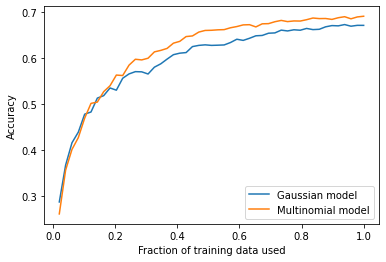

/var/folders/0l/07sm7bzd4tv5q4zqqs62lg1m0000gn/T/ipykernel_2155/210558127.py:39: RuntimeWarning: invalid value encountered in long_scalars
  acc = np.sum(preds == y[val])/np.array(preds).shape[0]


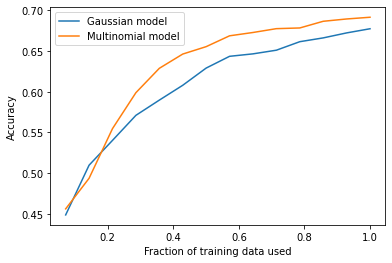

In [148]:
# Scaling dataset: 20%, 40%, 60%, 80% - 20

scales = np.linspace(0, 1, 15)
indices = [int(s * hash_train_20.shape[0]) for s in scales]

data = hash_train_20
gauss_accs, multi_accs = [], []
for k, i in enumerate(indices):
    gauss_accs.append(five_cv.kfoldCV(data[:i],train_label_20[:i], Gaussian()))
    multi_accs.append(five_cv.kfoldCV(count_train_20[:i],train_label_20[:i], Multinomial()))

plt.plot(scales, gauss_accs, label="Gaussian model")
plt.plot(scales, multi_accs, label="Multinomial model")
plt.legend()
plt.xlabel("Fraction of training data used")
plt.ylabel("Accuracy")
plt.show()



/var/folders/0l/07sm7bzd4tv5q4zqqs62lg1m0000gn/T/ipykernel_2155/210558127.py:58: RuntimeWarning: invalid value encountered in long_scalars
  acc = np.sum(preds == y[val])/np.array(preds).shape[0]


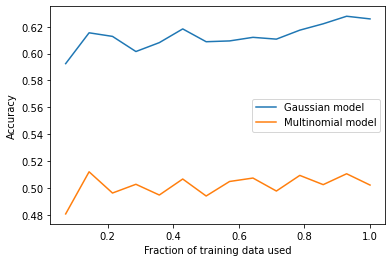

In [150]:
# Scaling dataset: 20%, 40%, 60%, 80% - Sentiment

scales = np.linspace(0, 1, 15)
indices = [int(s * hash_train_20.shape[0]) for s in scales]

data = hash_train_sentiment
gauss_accs, multi_accs = [], []
for k, i in enumerate(indices):
    gauss_accs.append(five_cv.kfoldCVSentiment(data[:i],train_label_sentiment[:i], Gaussian()))
    multi_accs.append(five_cv.kfoldCVSentiment(count_train_20[:i],train_label_sentiment[:i], Multinomial()))

plt.plot(scales, gauss_accs, label="Gaussian model")
plt.plot(scales, multi_accs, label="Multinomial model")
plt.legend()
plt.xlabel("Fraction of training data used")
plt.ylabel("Accuracy")
plt.show()
